<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Various-Clustering-Techniques/blob/main/Various_Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Various Clustering Techniques**

## K-Means Clustering

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled 
multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering 
looks like:

*   The "cluster center" is the arithmetic mean of all the points belonging to 
    to cluster.
*   Each point is closer to its own cluster center than to other cluster centers
Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within 
data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and 
we will walk through it briefly here. In short, the expectation–maximization approach here consists of the 
following procedure:
1.  Choose sum random cluster centers
2.  Repeat this step untill it converges.
     *  E-Step: assign points to the nearest cluster center.
     *  M-Step: set the cluster centers to the mean


In [5]:
# Importing all relevant libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Loading the dataset from github

In [6]:
# The dataset which I have used is uploaded in the below git-repo
dataset_path = 'https://github.com/Karishma-Kuria/CMPE-255-Various-Clustering-Techniques/blob/main/LoanDetail.csv?raw=true'
loan_ds = pd.read_csv(dataset_path, header=0)
loan_ds.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001003   Male     Yes  ...            1.0         Rural           N
1  LP001005   Male     Yes  ...            1.0         Urban           Y
2  LP001006   Male     Yes  ...            1.0         Urban           Y
3  LP001008   Male      No  ...            1.0         Urban           Y
4  LP001013   Male     Yes  ...            1.0         Urban           Y

[5 rows x 13 columns]

## Visualizing the data

In [7]:
data = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)


ApplicantIncome  LoanAmount
0             4583       128.0
1             3000        66.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


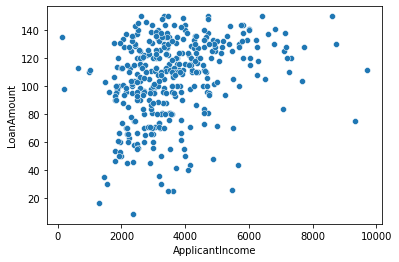

In [8]:
X = data.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

## Encoding Categorical values

Since K-mean only works with numerical data and not all the features can be represented into numerical form. So in this case I will be working with 2 features which are **ApplicantIncome** and **LoanAmount**.

In [9]:
# For number of clusters = 3
kmean = KMeans(n_clusters=3)
y_predicted = kmean.fit_predict(loan_ds[['ApplicantIncome','LoanAmount']])
y_predicted

array([2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2,

In [10]:
loan_ds['cluster']=y_predicted
loan_ds.head()

Loan_ID Gender Married  ... Property_Area Loan_Status cluster
0  LP001003   Male     Yes  ...         Rural           N       2
1  LP001005   Male     Yes  ...         Urban           Y       1
2  LP001006   Male     Yes  ...         Urban           Y       1
3  LP001008   Male      No  ...         Urban           Y       0
4  LP001013   Male     Yes  ...         Urban           Y       1

[5 rows x 14 columns]

In [11]:
# Printing centroids for the 3 clusters
kmean.cluster_centers_

array([[6512.76744186,  119.48837209],
       [2510.61081081,   97.85945946],
       [4048.4248366 ,  109.52941176]])

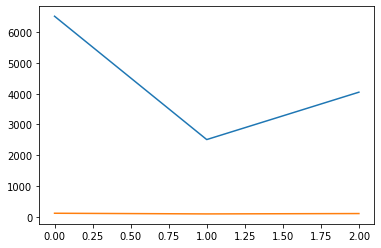

In [12]:
# Visualizing the centroids
plt.plot(kmean.cluster_centers_)

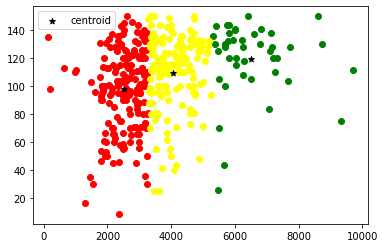

In [13]:
data_frame1 = loan_ds[loan_ds.cluster==0]
data_frame2 = loan_ds[loan_ds.cluster==1]
data_frame3 = loan_ds[loan_ds.cluster==2]
plt.scatter(data_frame1.ApplicantIncome,data_frame1['LoanAmount'],color='green')
plt.scatter(data_frame2.ApplicantIncome,data_frame2['LoanAmount'],color='red')
plt.scatter(data_frame3.ApplicantIncome,data_frame3['LoanAmount'],color='yellow')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

## Elbow Plot

This method is used to define the value for number of clusters which is k

In [14]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(loan_ds[['ApplicantIncome','LoanAmount']])
    sse.append(km.inertia_)

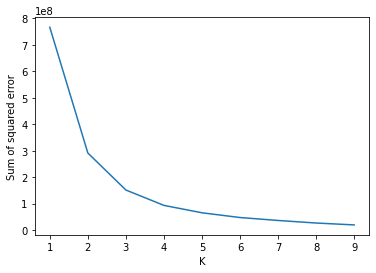

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Since the Sum of the squared error does not reduce much after 4 so we can set k=4 here.

We can also define the kmean function as shown below:

In [16]:
import random
def kmeans_algo(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


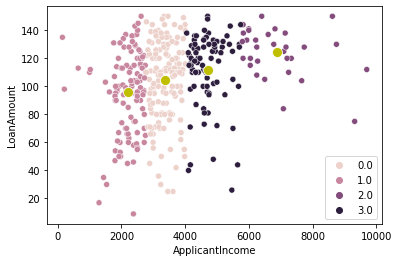

In [17]:
# Since we have already calculated the value of k above we can apply kmean
k = 4
centroids, cluster = kmeans_algo(X, k)
# Plotting the centroids along with clusters
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

In the above figure all the four colors represent 4 clusters and the green color represents the 4 centroids.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


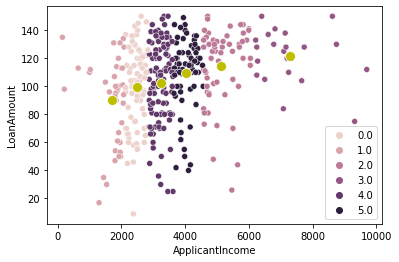

In [18]:
# Since we have already calculated the value of k above we can apply kmean
k = 6
centroids, cluster = kmeans_algo(X, k)
# Plotting the centroids along with clusters
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

As clear from the above result k-mean clustering is good here only with few values of K. E-M doesn't assure that it will lead to the global best solution.

**Limitation of K-means**


1.   The number of clusters must be selected beforehand.
2.   It is limited to linear cluster boundaries.
3.   It is slow for large number of data samples.





# Hierarchical clustering

In hierarchical clustering, successive clusters are discovered using previously established clusters.
It can further be divided into 


1.   **Divisive algorithms:** begins with all data elements in one cluster,
       which is later successively divided into smaller ones.

2.   **Agglomerative algorithms:** begins with single-element clusters and 
       works by successively merging them into larger ones.
 
 Both of the above methods rely on similarity matrix between all of the data points, which is usually calculated by cosine or Jaccard distance. 



In [19]:
# I have used the same dataset as before
dataset = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

ApplicantIncome  LoanAmount
0         0.999610    0.027918
1         0.999758    0.021995
2         0.998923    0.046408
3         0.999724    0.023494
4         0.999172    0.040686

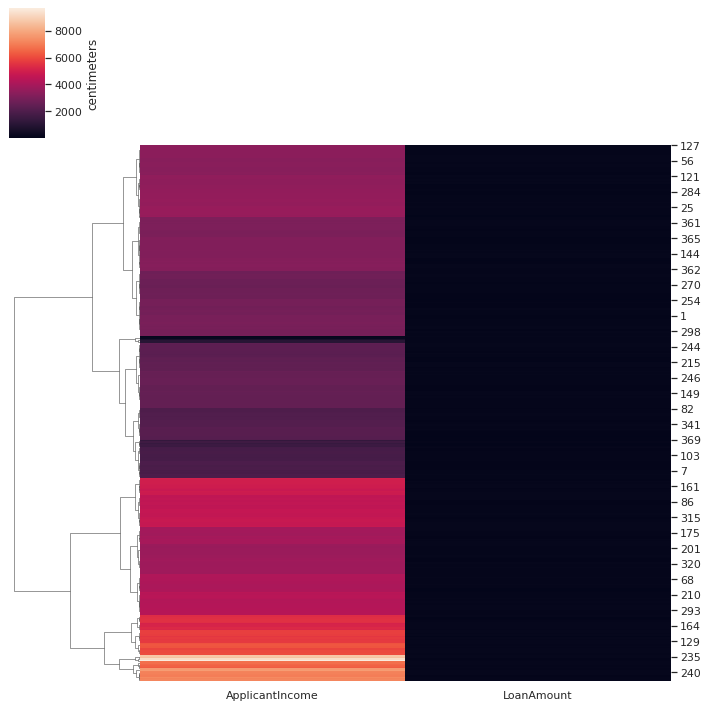

In [20]:
import seaborn as sns; sns.set(color_codes=True)
sns.clustermap(data, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'});

## From the above heat map it is clear that there are 2 clusters.

## I have also drawn a dendogram to decide the number of clusters for the dataset with the above 2 features.

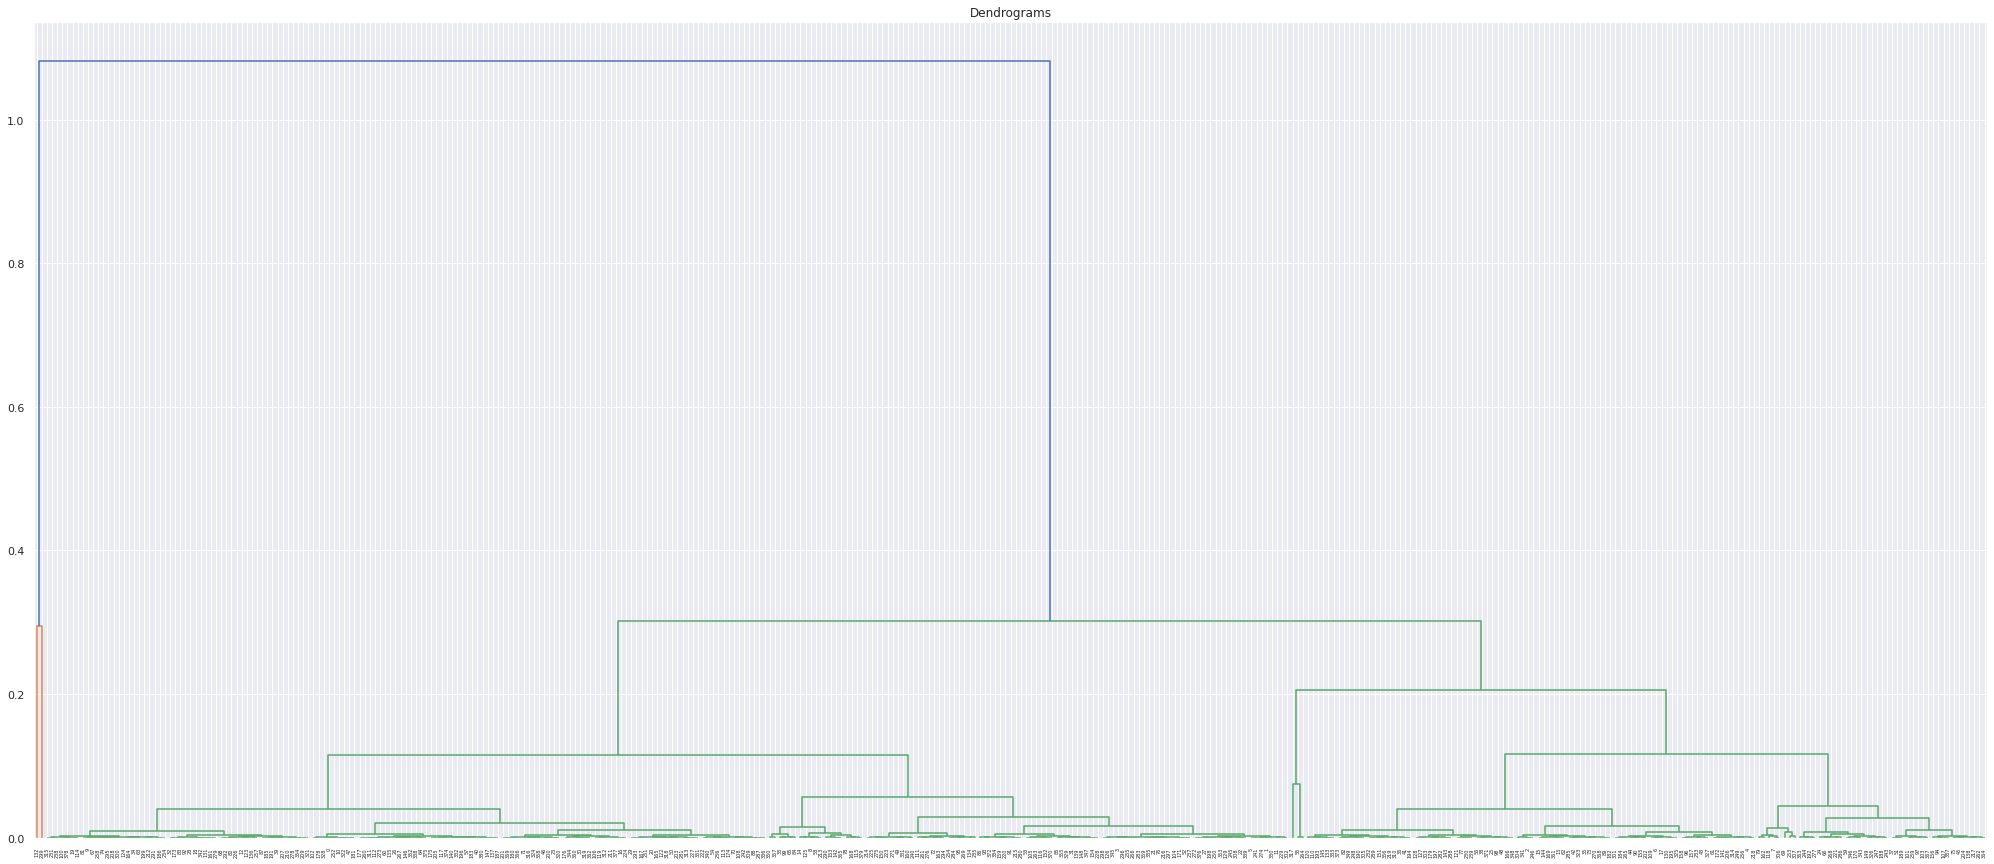

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(35, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

## In the above graph the x-axis contains the sample and the y-axis contains the distance between each samples. Also the line with maximum distance in the graph is the blue line and hence we can cut the above dendogram at 0.4.

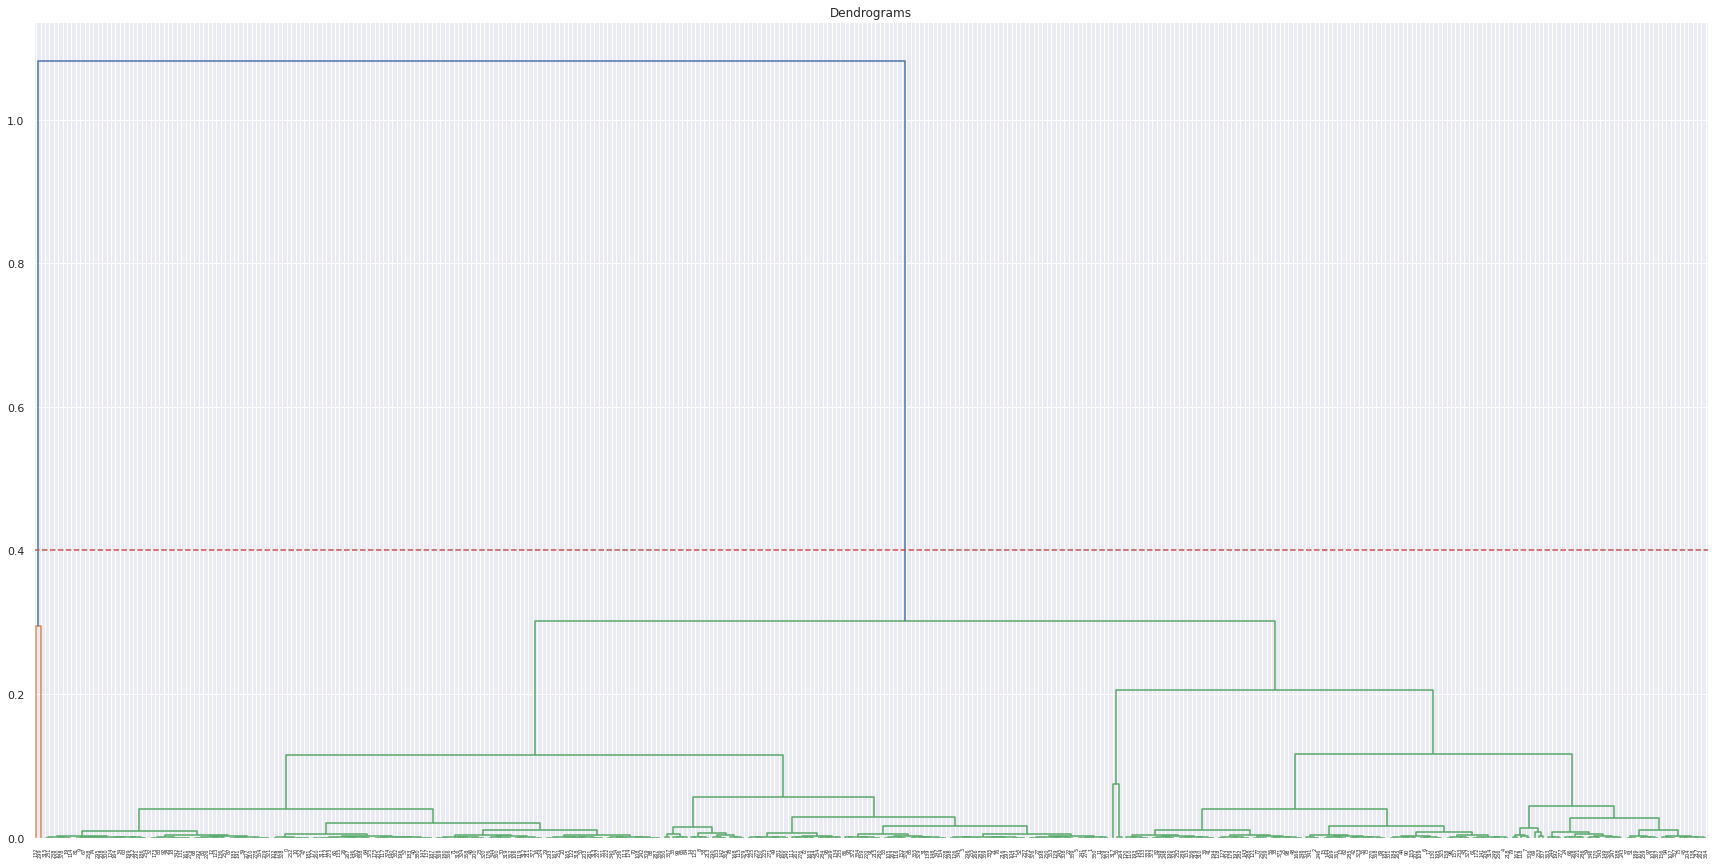

In [22]:
plt.figure(figsize=(30, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.4, color='r', linestyle='--')

## So as per the above graph this line cuts the dendogram into 2 parts, so number of clusters = 2.

## In order to measure how well our clustering worked, the above colors in Dendogram shows how clearly the items are clustered with other similar items in the dataset.

In [23]:
# Used Agflomerative Clustering with euclidean distance and created a distance matrix
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clusters.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

# **Gaussian mixture models clustering (not from scratch)**

Its a function that consists of several Gaussians,identified by k -> {1,…, K}, where K = number of clusters of our dataset. Each Gaussian k in the mixture is comprised of the following parameters:
*   Mean that defines its centre.
*   Covariance that defines its width.
*   Mixing Probability that defines how big or small the Gaussian function will
    be.





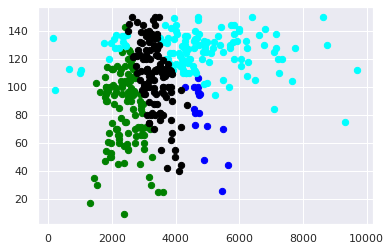

In [24]:
import sklearn.mixture
from sklearn.mixture import GaussianMixture
data = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)
X = data.values
gmm = GaussianMixture(n_components=4).fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],s=40,cmap='viridis')
plt.show()

### GMM is a probabilistic model so it is possible to calculate the probability of the cluster assignment. In Scikit Learn we use the predict_proba method for this. It returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

In [26]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.14  0.002 0.831 0.027]
 [0.    0.677 0.    0.323]
 [0.    0.382 0.305 0.313]
 [0.    0.    1.    0.   ]
 [0.    0.794 0.054 0.152]]


## Visualizing uncertainty: by making the size of each point proportional to the certainty of its prediction

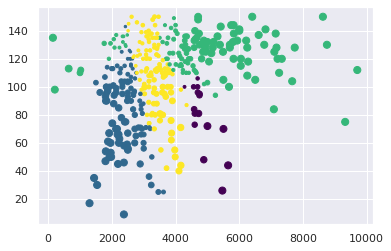

In [27]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

## Looking at the above figure, it's clear that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment.

# DB Scan Clustering (not from scratch) using pycaret library 

In [28]:
# Installing Pycaret
!pip install pycaret

In [29]:
# importing colab model
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [30]:
# I am using the same dataset as used in the above techniques
loan_ds.head()

Loan_ID Gender Married  ... Property_Area Loan_Status cluster
0  LP001003   Male     Yes  ...         Rural           N       2
1  LP001005   Male     Yes  ...         Urban           Y       1
2  LP001006   Male     Yes  ...         Urban           Y       1
3  LP001008   Male      No  ...         Urban           Y       0
4  LP001013   Male     Yes  ...         Urban           Y       1

[5 rows x 14 columns]

In [31]:
loan_ds.shape

(381, 14)

In order to demonstrate the predict_model() function on unseen data, a sample of 5% (54 records) has been withheld from the original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 54 samples were not available at the time when this experiment was performed.

In [32]:
data = loan_ds.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_notused = loan_ds.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_notused.shape))

Data for Modeling: (362, 14)
Unseen Data For Predictions: (19, 14)


## Setting up Environment in PyCaret

In [48]:
# Importing pycaret
from pycaret.clustering import *

In [49]:
test = setup(data, normalize = True, 
                   ignore_features = ['Loan_ID'],
                   session_id = 123)

Description                 Value
0                               session_id                   123
1                            Original Data             (362, 14)
2                           Missing Values                  True
3                         Numeric Features                     4
4                     Categorical Features                     9
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data             (362, 33)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  6392
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

## Creating Model

In [50]:
# Created a model for DB Scan
dbscan = create_model('dbscan')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0           0                  0  ...           0             0

[1 rows x 6 columns]

In [51]:
print(dbscan)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


In [57]:
# creating a model with 5 clusters
dbscanmode = create_model('dbscan', num_clusters = 5)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0           0                  0  ...           0             0

[1 rows x 6 columns]

In [58]:
print(dbscanmode)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


## Assign Model

In [59]:
dbscan_results = assign_model(dbscanmode)
dbscan_results.head()

Loan_ID Gender Married  ... Loan_Status cluster     Cluster
0  LP001259   Male     Yes  ...           N       1  Cluster -1
1  LP001798   Male     Yes  ...           Y       0  Cluster -1
2  LP001778   Male     Yes  ...           Y       1  Cluster -1
3  LP001532   Male     Yes  ...           N       1  Cluster -1
4  LP002443   Male     Yes  ...           N       2  Cluster -1

[5 rows x 15 columns]

In [60]:
dbscan_results.shape

(362, 15)

Note that a new column called Cluster has been added to the original dataset. dbscan_results also includes the Losn_ID feature that we dropped during the setup() but it was not used for the model and is only appended to the dataset when we use assign_model().

## Visualizing Model

In [61]:
plot_model(dbscanmode)

## Distribution Plot

In [62]:
plot_model(dbscanmode, plot = 'distribution')

In [64]:
# Plotting graph for ApplicantIncome feature
plot_model(dbscanmode, plot = 'distribution', feature = 'ApplicantIncome')

In [65]:
# Plotting graph for LoanAmount feature
plot_model(dbscanmode, plot = 'distribution', feature = 'LoanAmount')

## Predict on unused data

## Saving the Model

In [67]:
save_model(dbscanmode,'Final DBSCAN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Loan_ID'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numer...
                 ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
         

## Loading the saved model

In [68]:
saved_dbscan = load_model('Final DBSCAN Model')

Transformation Pipeline and Model Successfully Loaded
